In [5]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api
import pandas as pd
from prophet import Prophet

In [6]:
df = pd.read_csv('avocado.csv')

In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [8]:
ts = df.groupby('Date')['AveragePrice'].sum().reset_index()

In [9]:
ts.rename(columns={"Date": "ds", "AveragePrice": "y"}, inplace = True)

In [10]:
ts

,ds,y
0,2015-01-04,140.54
1,2015-01-11,148.03
2,2015-01-18,150.24
3,2015-01-25,150.89
4,2015-02-01,134.68
...,...,...
164,2018-02-25,146.84
165,2018-03-04,145.82
166,2018-03-11,144.19
167,2018-03-18,141.88


In [11]:
m = Prophet()
m.fit(ts)

22:21:13 - cmdstanpy - INFO - Chain [1] start processing
22:21:13 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [13]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,138.869810,125.304213,153.050617
530,2019-03-22,139.083210,125.833154,152.046547
531,2019-03-23,139.332666,126.427688,153.259934
532,2019-03-24,139.615427,126.630585,152.490973
533,2019-03-25,139.927821,126.489817,152.779794


C:\Users\topher\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\topher\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


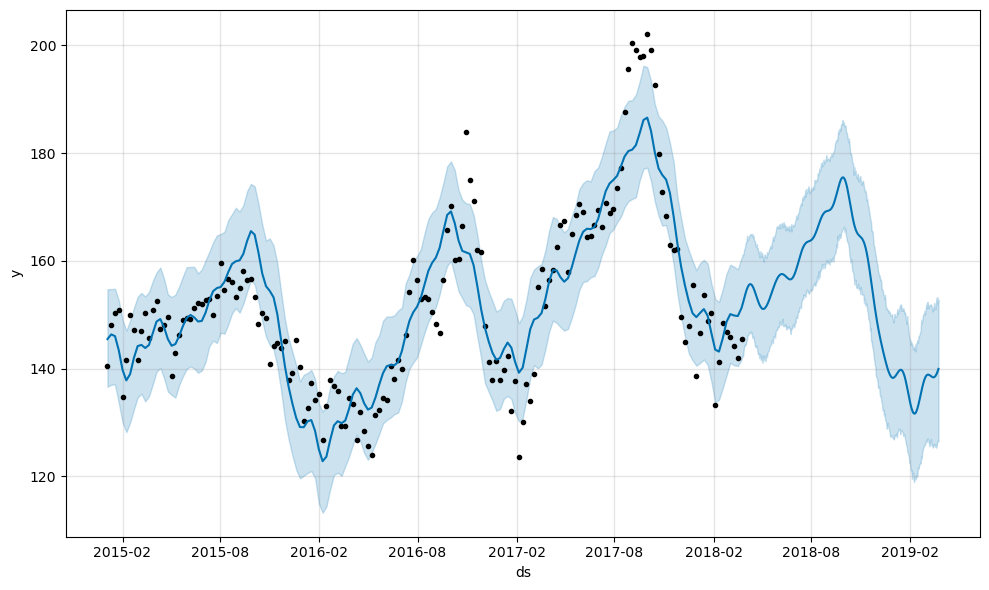

In [14]:
# Python
fig1 = m.plot(forecast)



C:\Users\topher\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\topher\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\topher\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

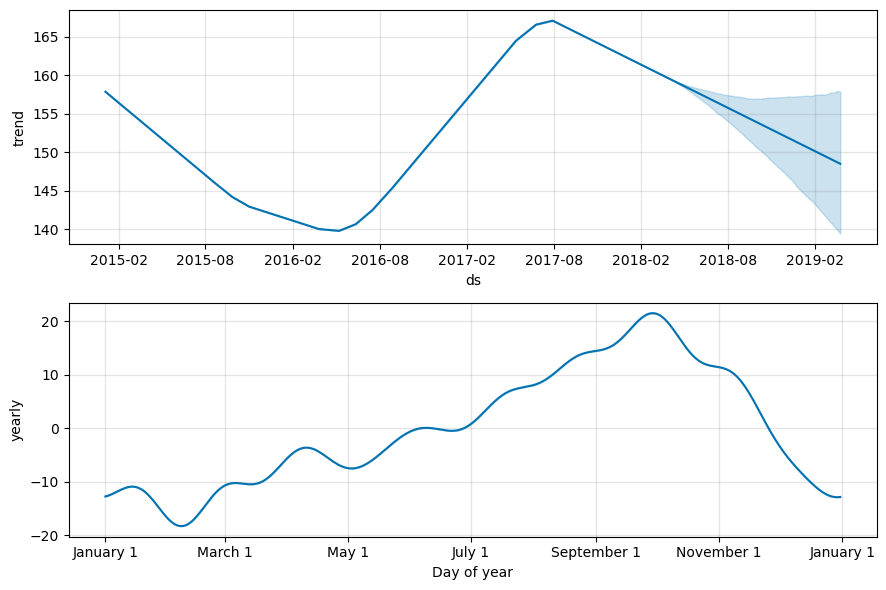

In [15]:
# Python
fig2 = m.plot_components(forecast)